<a href="https://colab.research.google.com/github/Siddhanttambe2/EDA/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA 1 : Bike Details Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("BIKE DETAILS.csv")
df

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]

In [6]:
#1. What is the range of selling prices in the datasetD

In [7]:
spr = (df['selling_price'].min(),df['selling_price'].max())
spr

(5000, 760000)

In [8]:
# 2. Median selling price

In [9]:
median = df['selling_price'].median()
median

45000.0

In [10]:
# 3. Most common seller type

In [12]:
mcs = df['seller_type'].mode()[0]
mcs

'Individual'

In [13]:
# 4. Number of bikes with km_driven > 50,000

In [16]:
Fifty_k = df[df["km_driven"]>50000].shape[0]
Fifty_k

170

In [17]:
# 5. Average km_driven for each ownership type


In [18]:
avg_km_bwner = df.groupby('owner')['km_driven'].mean()
avg_km_bwner


owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [19]:
# 6. Proportion of bikes from the year 2015 or older

In [25]:
bike_2015 = (df['year']<=2015).sum()/len(df)
bike_2015

0.5664467483506126

In [26]:
# 7. Missing values trend

In [27]:
missing = df.isnull().sum()
missing

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

In [31]:
# 8. Highest ex_showroom_price and corresponding bike name

In [33]:
highest_ex_showroom_price = df['ex_showroom_price'].max()
highest_ex_showroom_price
bike_highest_ex_showroom = df.loc[df['ex_showroom_price'].idxmax(), 'name']
bike_highest_ex_showroom


'Harley-Davidson Street Bob'

In [35]:
# 9. Total bikes listed by each seller type

In [37]:
bKS = df["seller_type"].value_counts()
bKS

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

In [38]:
# 10. Relationship between selling_price and km_driven for first-owner bikes


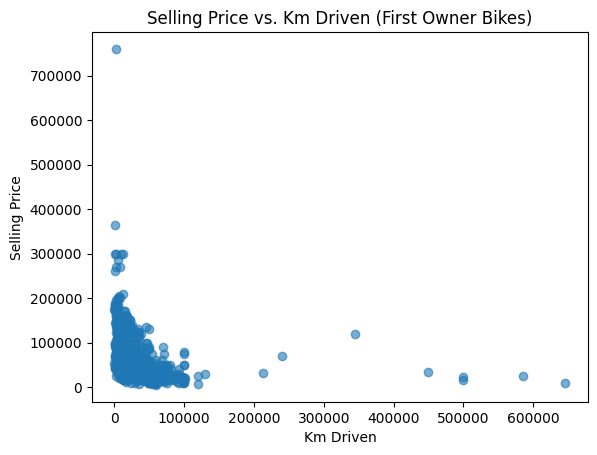

In [39]:
first_owner_bikes = df[df['owner'] == '1st owner']
plt.scatter(first_owner_bikes['km_driven'], first_owner_bikes['selling_price'], alpha=0.6)
plt.title('Selling Price vs. Km Driven (First Owner Bikes)')
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')
plt.show()

In [40]:
# 11. Remove outliers in km_driven using the IQR method


In [41]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]
print(f"Data size after removing km_driven outliers: {data_no_outliers.shape[0]}")

Data size after removing km_driven outliers: 1022


In [42]:
# 12. Bivariate analysis of year and selling_price

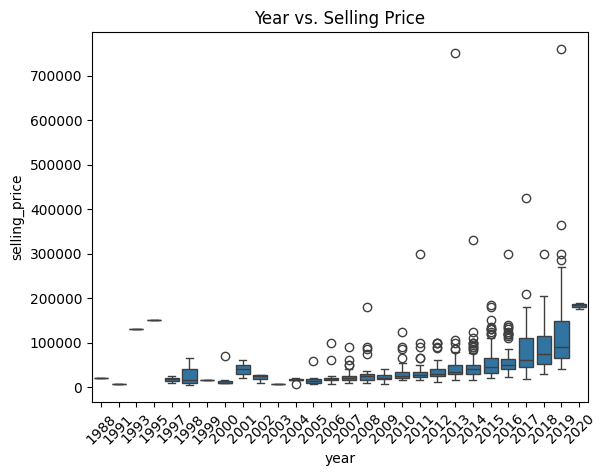

In [43]:
sns.boxplot(x='year', y='selling_price', data=df)
plt.title('Year vs. Selling Price')
plt.xticks(rotation=45)
plt.show()

In [44]:
# 13. Average depreciation in selling price based on bike age

In [45]:
current_year = 2024
df['bike_age'] = current_year - df['year']
average_depreciation = df.groupby('bike_age')['selling_price'].mean()
print("Average depreciation in selling price by bike age:")
print(average_depreciation)

Average depreciation in selling price by bike age:
bike_age
4     183333.333333
5     119689.511628
6      87660.374046
7      78894.736842
8      58469.018692
9      56500.000000
10     48668.131868
11     51136.986301
12     35748.400000
13     35655.721311
14     31793.333333
15     22267.857143
16     34289.285714
17     24927.586207
18     23380.000000
19     16978.571429
20     15100.000000
21      8000.000000
22     20666.666667
23     40000.000000
24     20833.333333
25     15000.000000
26     28333.333333
27     17500.000000
29    150000.000000
31    130000.000000
33      6000.000000
36     20000.000000
Name: selling_price, dtype: float64


In [46]:
# 14. Bikes priced significantly above the average price for their manufacturing year

In [48]:
avg_price_by_year = df.groupby('year')['selling_price'].mean()
high_priced_bikes = df[df.apply(lambda row: row['selling_price'] > avg_price_by_year[row['year']], axis=1)]
print("Bikes priced significantly above average for their year:")
print(high_priced_bikes[['name', 'year', 'selling_price']])

Bikes priced significantly above average for their year:
                                      name  year  selling_price
0                Royal Enfield Classic 350  2019         175000
2      Royal Enfield Classic Gunmetal Grey  2018         150000
3        Yamaha Fazer FI V 2.0 [2016-2018]  2015          65000
7     Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                           Yamaha YZF R3  2019         365000
...                                    ...   ...            ...
1004                  Bajaj Pulsar  NS 200  2016          60000
1005                    TVS Apache RTR 160  2014          60000
1008                    Bajaj Pulsar 220 F  2012          52000
1012                   Bajaj Pulsar NS 200  2014          50000
1023                Bajaj Avenger 220 dtsi  2012          45000

[334 rows x 3 columns]


In [49]:
# 15. Correlation matrix and heatmap

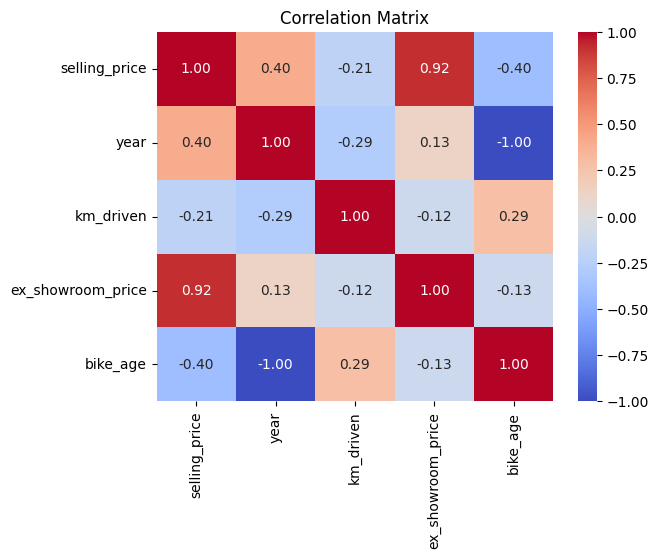

In [52]:
numerical_df = df.select_dtypes(include=np.number)

correlation_matrix = numerical_df.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

EDA 2 : Car Sale


In [6]:
df1 = pd.read_csv("Car Sale.csv")
df1

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

In [4]:
# 1. Average selling price by dealer

In [6]:
asp = df1.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
asp

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales                                    28013.060317
Diehl Motor CO Inc                                 27993.929487
Motor Vehicle Branch Office                        27956.739617
Ryder Truck Rental and Leasing                     27914.988782
Progressive Shippers Cooperative Association No    27884.264036
New Castle Ford Lincoln Mercury                    27867.131955
Hatfield Volkswagen                                27853.712242
Nebo Chevrolet                                     27818.889415
Clay Johnson Auto Sales                            27816.027113
McKinney Dodge Chrysler Jeep                       27684.096979
Chrysler Plymouth                                  27555.526400
Pitre Buick-Pontiac-Gmc of Scottsdale              27404.248408
Buddy Storbeck's Diesel Service Inc                27217.261563
Name: Price ($), dtype: float64

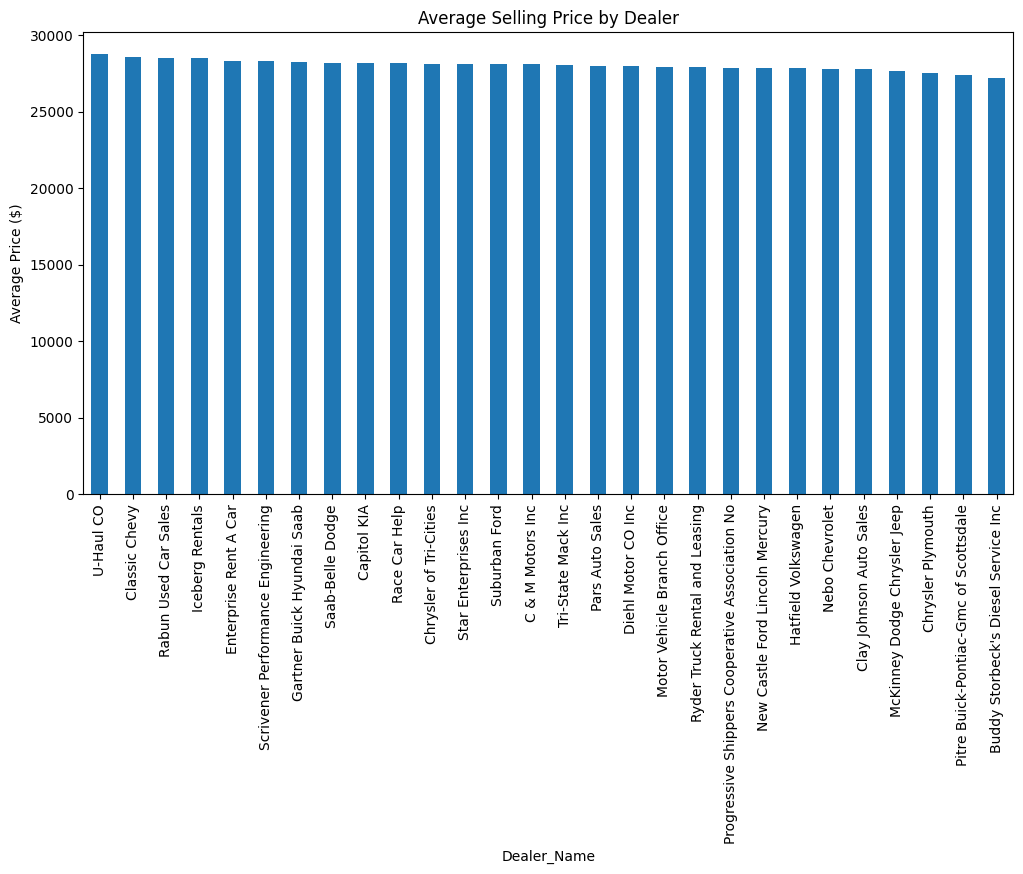

In [7]:
asp.plot(kind='bar', figsize=(12, 6), title='Average Selling Price by Dealer')
plt.ylabel('Average Price ($)')
plt.show()

In [8]:
# 2. Car brand with highest price variation

In [10]:
price_variation_by_company = df1.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
most_variable_company = price_variation_by_company.idxmax()

price_variation_by_company

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

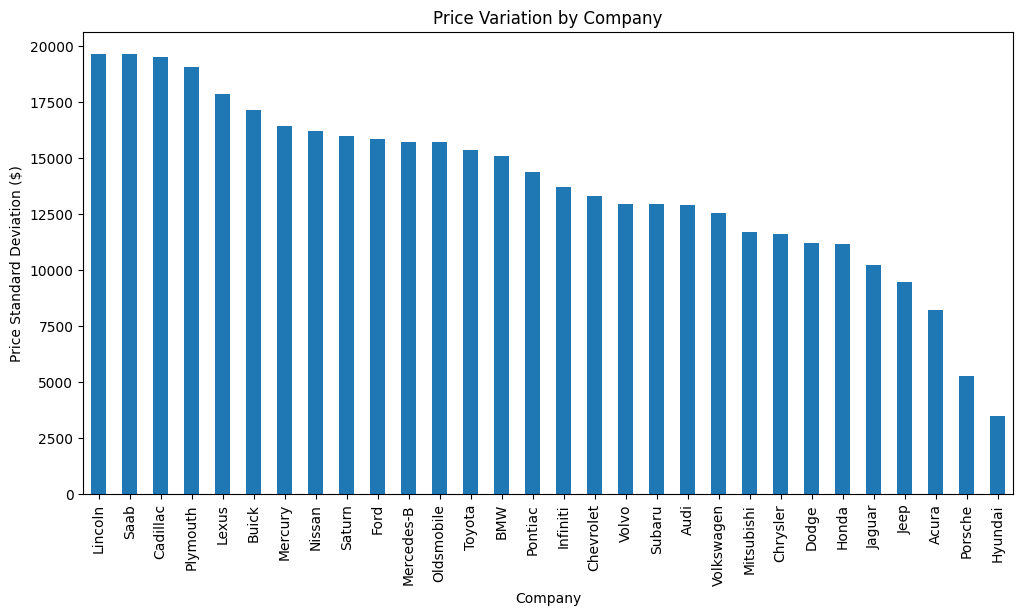

In [11]:
plt.figure(figsize=(12, 6))
price_variation_by_company.plot(kind='bar', title='Price Variation by Company')
plt.ylabel('Price Standard Deviation ($)')
plt.show()

In [2]:
# 3. Price distribution by transmission type

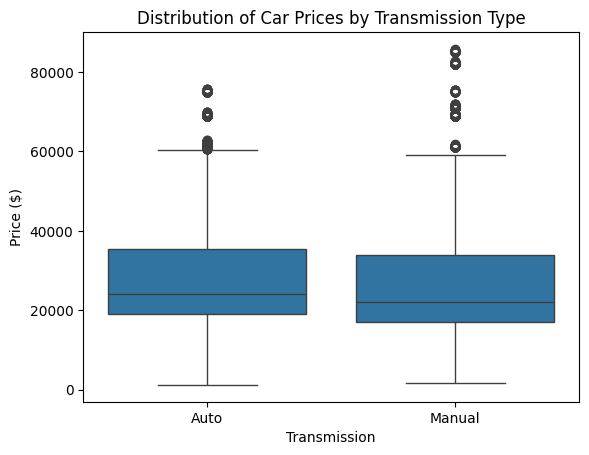

In [7]:
sns.boxplot(x='Transmission', y='Price ($)', data=df1)
plt.title('Distribution of Car Prices by Transmission Type')
plt.show()

In [8]:
# 4. Price distribution by regions

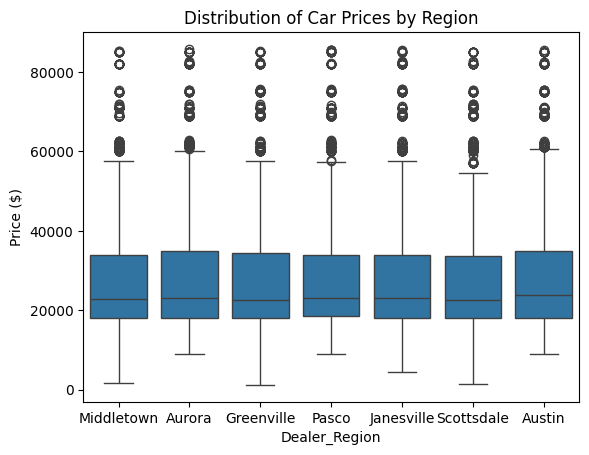

In [9]:
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df1)
plt.title('Distribution of Car Prices by Region')
plt.show()


In [10]:
# 5. Distribution of cars by body styles


In [12]:
body_style_counts = df1['Body Style'].value_counts()
body_style_counts

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

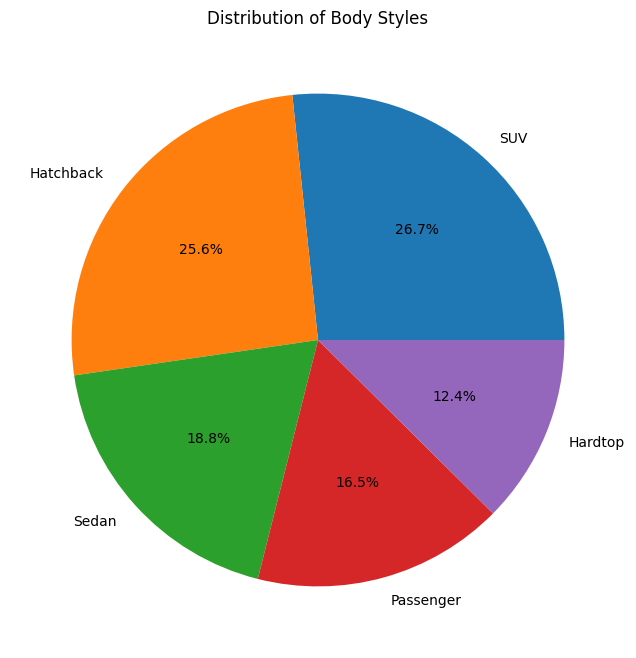

In [13]:
body_style_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Distribution of Body Styles')
plt.ylabel('')
plt.show()

In [14]:
#Average price by gender and annual income

In [18]:
avg_price_by_gender_income = df1.groupby('Gender')[['Price ($)', 'Annual Income']].mean()
avg_price_by_gender_income

Price ($)  Annual Income
Gender                             
Female  28277.265270  755973.021339
Male    28039.429407  851184.044207

In [19]:
# 7. Price distribution and cars sold by region

<ipython-input-21-94b9b01993e0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dealer_Region', y='Price ($)', data=df1, palette='Set3')


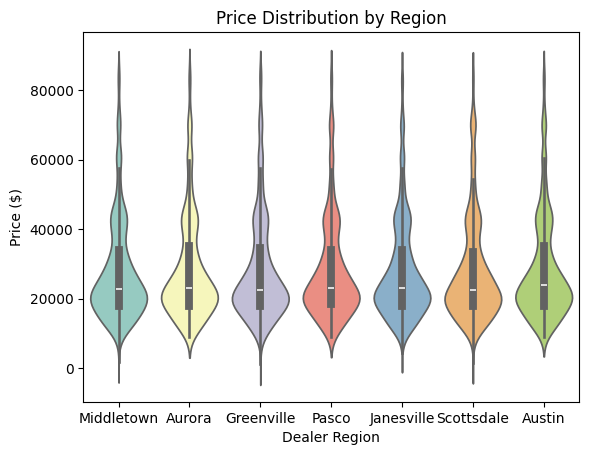

Number of Cars Sold by Region:
Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


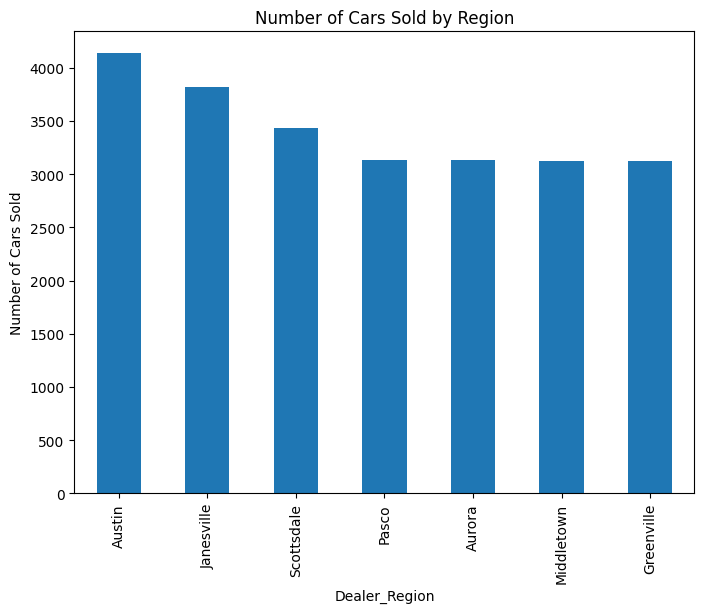

In [21]:
sns.violinplot(x='Dealer_Region', y='Price ($)', data=df1, palette='Set3')
plt.xlabel('Dealer Region')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Region')
plt.show()

region_sales = df1['Dealer_Region'].value_counts()
print("Number of Cars Sold by Region:")
print(region_sales)

region_sales.plot(kind='bar', figsize=(8, 6), title='Number of Cars Sold by Region')
plt.ylabel('Number of Cars Sold')
plt.show()

In [22]:
# 8. Average price by engine size


Average Price by Engine Size:
Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


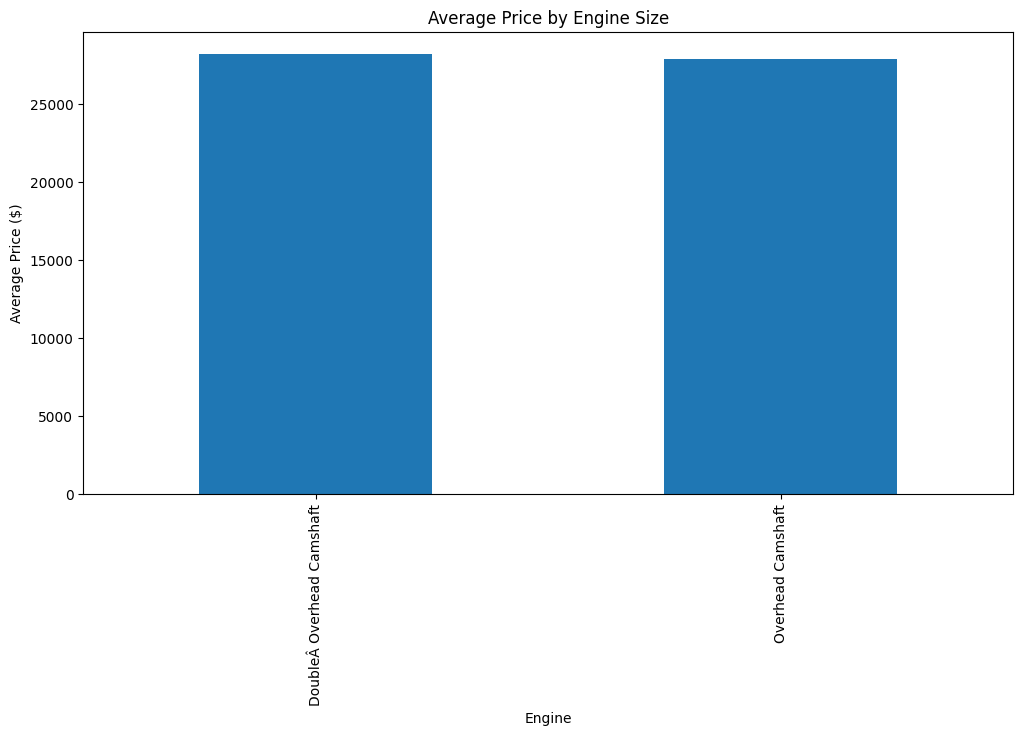

In [23]:
avg_price_by_engine = df1.groupby('Engine')['Price ($)'].mean()
print("Average Price by Engine Size:")
print(avg_price_by_engine)

avg_price_by_engine.plot(kind='bar', figsize=(12, 6), title='Average Price by Engine Size')
plt.ylabel('Average Price ($)')
plt.show()

In [24]:
# 9. Price by income brackets

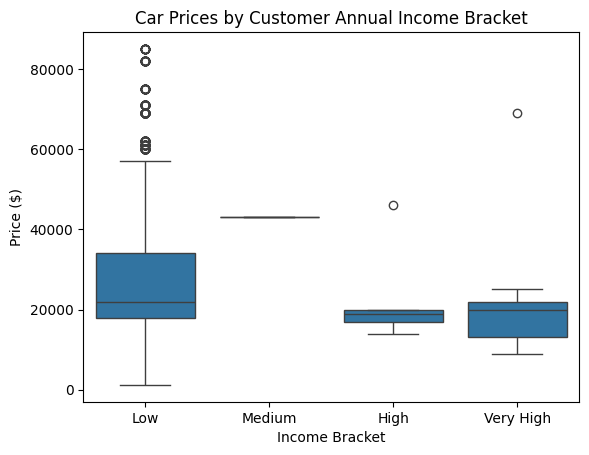

In [27]:
df1['Income Bracket'] = pd.cut(df1['Annual Income'], bins=[0, 50000, 100000, 150000, 200000], labels=['Low', 'Medium', 'High', 'Very High'])
sns.boxplot(x='Income Bracket', y='Price ($)', data=df1)
plt.title('Car Prices by Customer Annual Income Bracket')
plt.show()

In [28]:
# 10. Top 5 car models with highest sales

In [30]:
top_models = df1['Model'].value_counts().head(5)
top_models

Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64

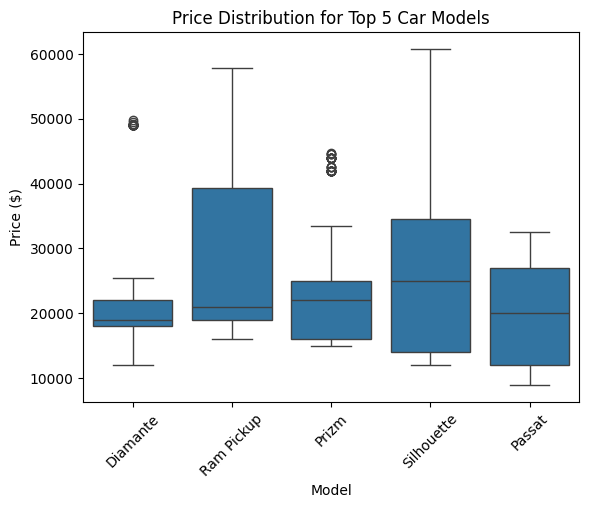

In [31]:
top_model_data = df1[df1['Model'].isin(top_models.index)]
sns.boxplot(x='Model', y='Price ($)', data=top_model_data)
plt.title('Price Distribution for Top 5 Car Models')
plt.xticks(rotation=45)
plt.show()

In [32]:
# 11. Price variation by engine size and color

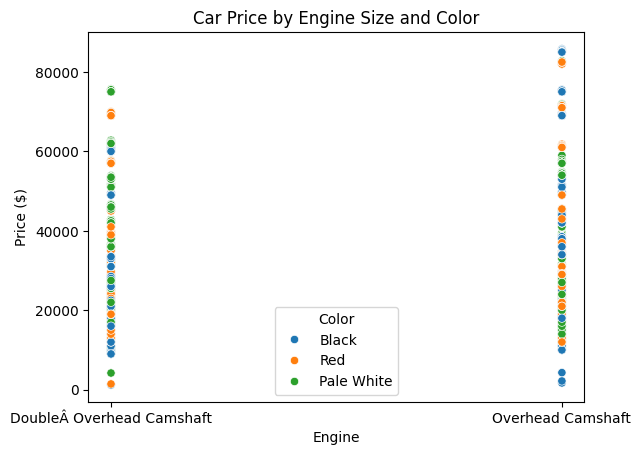

Colors with Highest Price Variation:
Color
Red           15519.360962
Black         15286.065976
Pale White    14077.346859
Name: Price ($), dtype: float64


In [33]:
sns.scatterplot(x='Engine', y='Price ($)', hue='Color', data=df1)
plt.title('Car Price by Engine Size and Color')
plt.show()

color_variation = df1.groupby('Color')['Price ($)'].std().sort_values(ascending=False)
print("Colors with Highest Price Variation:")
print(color_variation)

In [34]:
# 12. Seasonal trend in car sales

Sales by Month:
Month
1      790
2      735
3     1535
4     1655
5     1895
6     1715
7     1725
8     1705
9     3305
10    1830
11    3470
12    3546
Name: count, dtype: int64


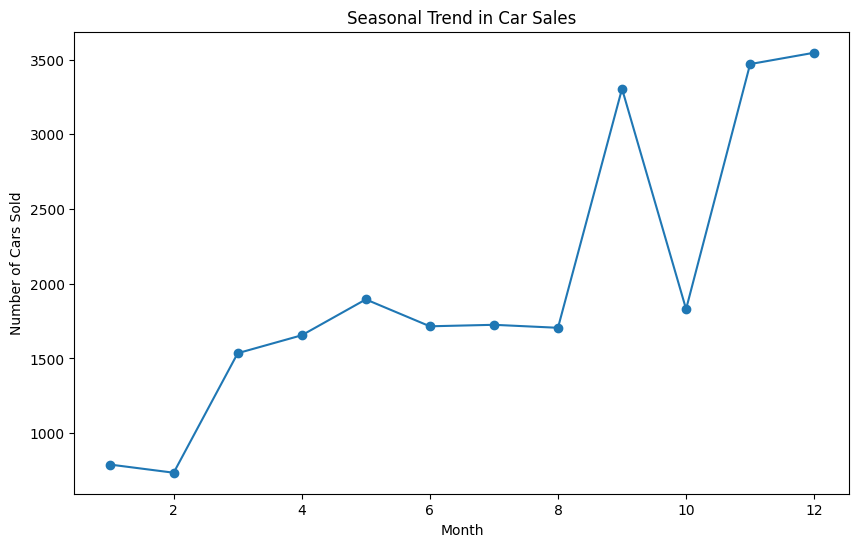

In [35]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Month'] = df1['Date'].dt.month
sales_by_month = df1['Month'].value_counts().sort_index()
print("Sales by Month:")
print(sales_by_month)

sales_by_month.plot(kind='line', marker='o', figsize=(10, 6), title='Seasonal Trend in Car Sales')
plt.ylabel('Number of Cars Sold')
plt.xlabel('Month')
plt.show()

In [36]:
# 13. Price distribution by body style and transmission

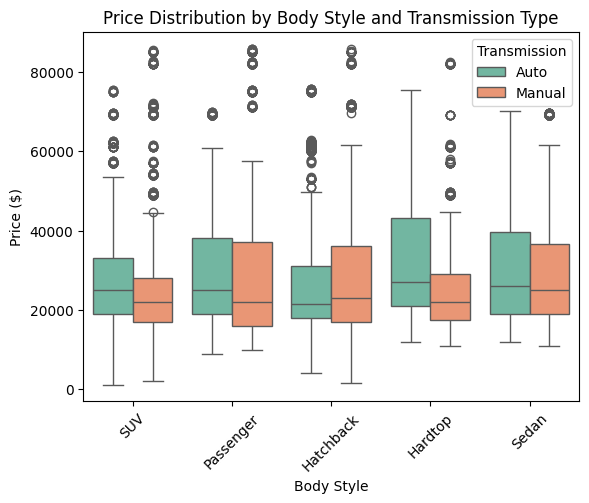

In [37]:
sns.boxplot(x='Body Style', y='Price ($)', hue='Transmission', data=df1, palette='Set2')
plt.xlabel('Body Style')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Body Style and Transmission Type')
plt.xticks(rotation=45)
plt.show()

In [39]:
# 14. Correlation analysis


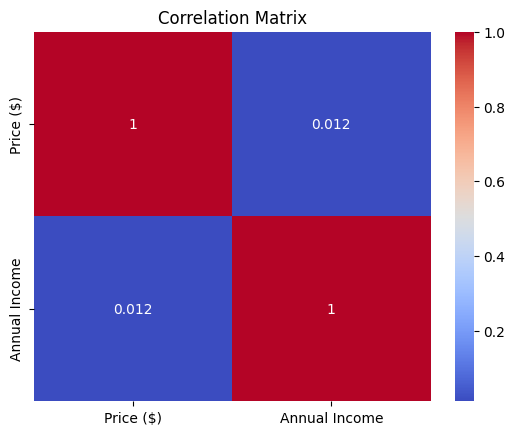

In [41]:
correlation_matrix = df1[['Price ($)', 'Annual Income']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
 #15. Average price by model and engine type

Average Price by Model and Engine Type:
Engine    DoubleÂ Overhead Camshaft  Overhead Camshaft
Model                                                 
3-Sep                  37986.380117                NaN
3000GT                 22764.326923       21770.659864
300M                   21394.888889                NaN
323i                   16744.632287       21038.162162
328i                   21069.149606       38676.177215
...                             ...                ...
Viper                  32118.479167       26052.375000
Voyager                22066.026316       33995.678322
Windstar               25145.636364       17100.272727
Wrangler               21145.294737       18742.942029
Xterra                 15940.459459       31072.500000

[154 rows x 2 columns]


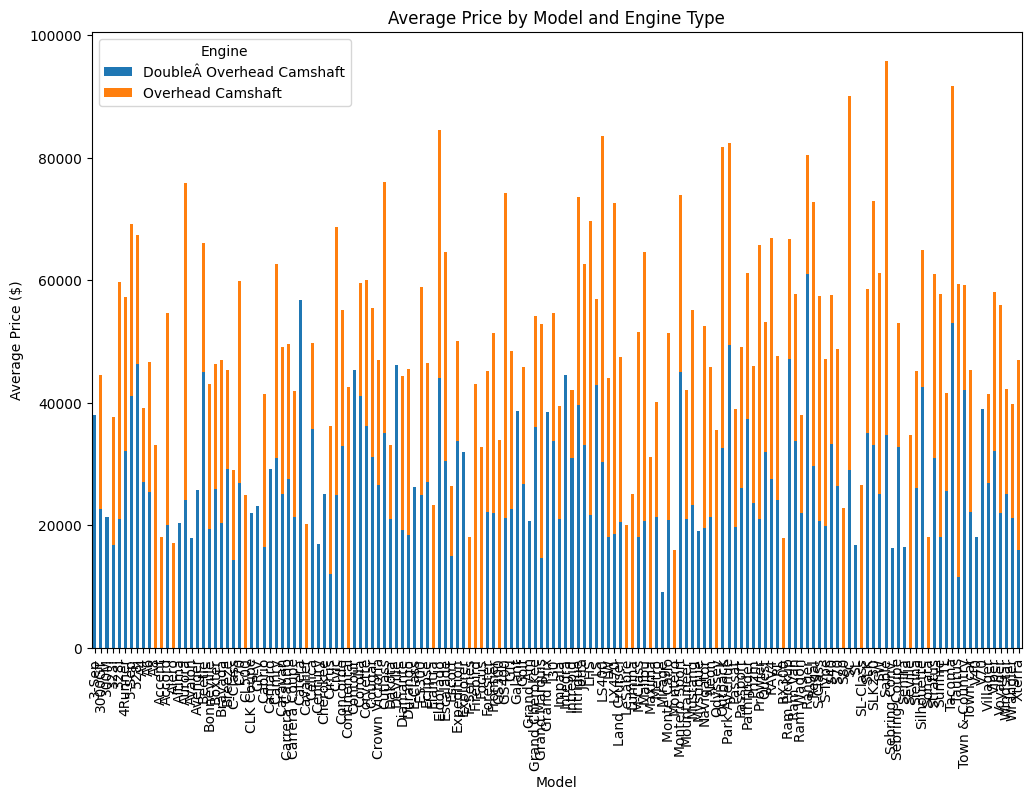

In [43]:
avg_price_model_engine = df1.groupby(['Model', 'Engine'])['Price ($)'].mean().unstack()
print("Average Price by Model and Engine Type:")
print(avg_price_model_engine)

avg_price_model_engine.plot(kind='bar', stacked=True, figsize=(12, 8), title='Average Price by Model and Engine Type')
plt.ylabel('Average Price ($)')
plt.show()


EDA 3 : Amazon Sales Data

In [3]:
df2 = pd.read_csv("amazon.csv")
df2

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Accessories&Peripherals|...             ₹399   
1     Computers&Accessories|Accessories&Peripherals|...             ₹199   
2     Computers&Accessories|Accessories&Peripherals|...             ₹199   
3     Computers&Accessories|Accessories&Peripherals|...             ₹329   
4     Computers&Accessories|Accessories&Peripherals|...             ₹154   
...                                                 ...              ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...             ₹379   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,280   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...           ₹2,219   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...           ₹1,399   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...           ₹2,863   

     actual_price discount_percentage rating rating_count  \
0          ₹1,099                 64%    4.2       24,269   
1            ₹349                 43%    4.0       43,994   
2          ₹1,899                 90%    3.9        7,928   
3            ₹699                 53%    4.2       94,363   
4            ₹399                 61%    4.2       16,905   
...           ...                 ...    ...          ...   
1460         ₹919                 59%      4        1,090   
1461       ₹3,045                 25%    4.1        4,118   
1462       ₹3,080                 28%    3.6          468   
1463       ₹1,890                 26%      4        8,031   
1464       ₹3,690                 22%    4.3        6,987   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sunde

In [4]:
#1. Calculate average rating for each product category

In [6]:
avg_rating_per_category = df2.groupby('category')['rating'].mean().sort_values(ascending=False)


TypeError: agg function failed [how->mean,dtype->object]

In [7]:
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

avg_rating_per_category = df2.groupby('category')['rating'].mean().sort_values(ascending=False)
avg_rating_per_category

category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                                                               4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                  3.5
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers    3.4
Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders                          3.3
Name: rating, Length: 211, dtype: float64

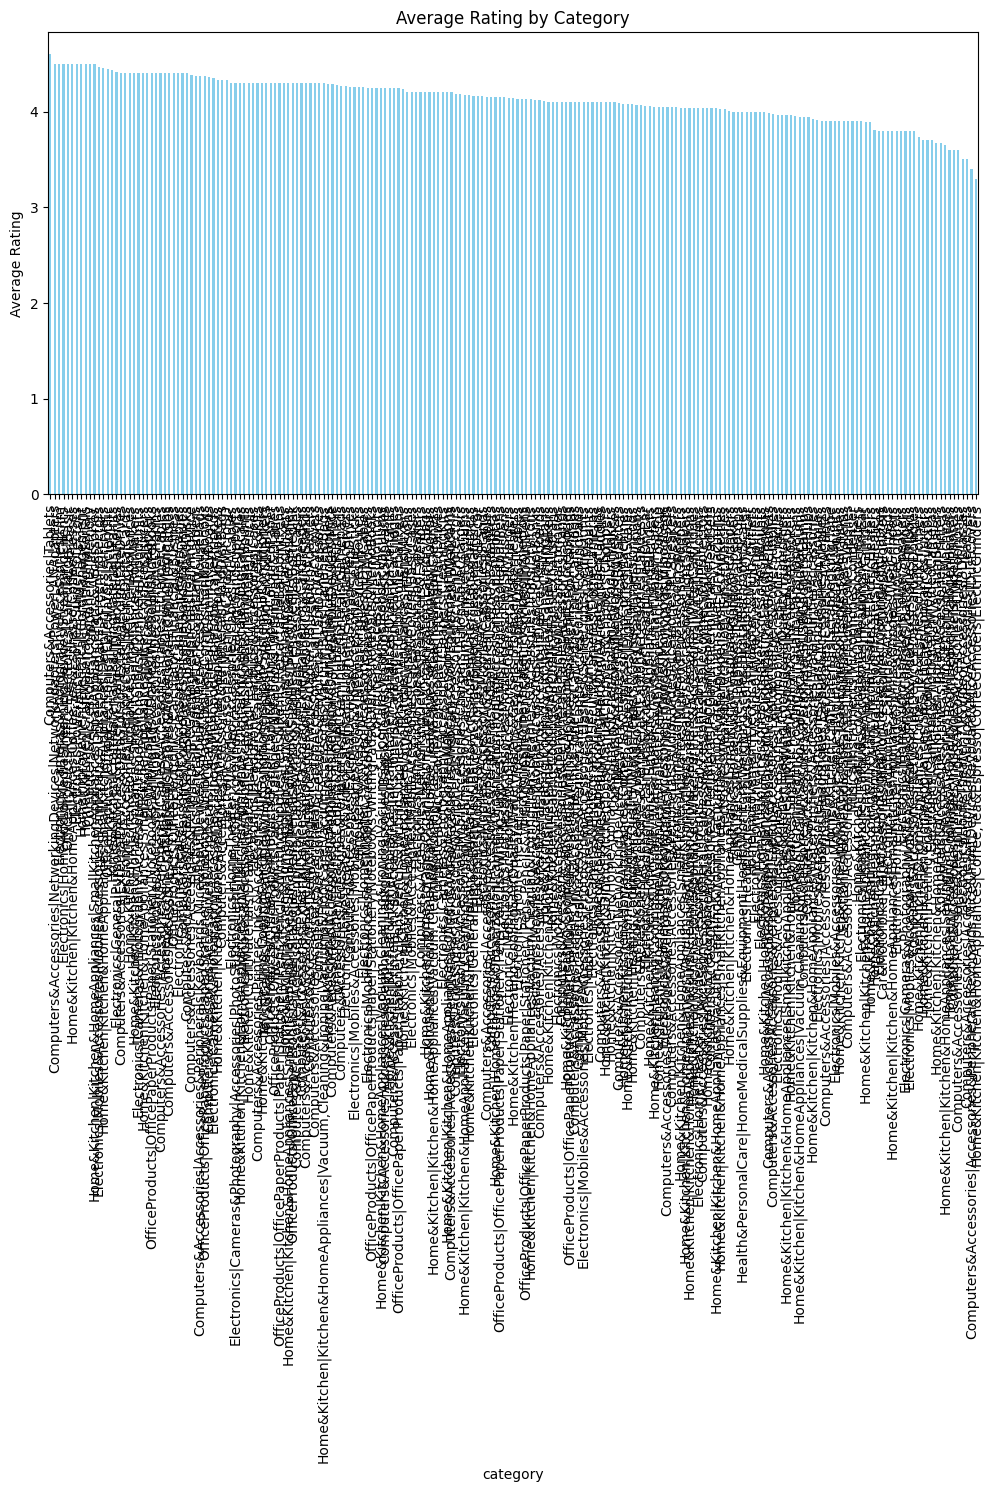

In [8]:
avg_rating_per_category.plot(kind='bar', figsize=(12, 6), title='Average Rating by Category', color='skyblue')
plt.ylabel('Average Rating')
plt.show()

In [9]:
# 2 .Find the top rating_count products by category


In [11]:
top_rating_products = df2.loc[df2.groupby('category')['rating_count'].idxmax()]
print("Top Rating_Count Products by Category:")
print(top_rating_products[['category', 'product_name', 'rating_count']])

Top Rating_Count Products by Category:
                                               category  \
1157  Car&Motorbike|CarAccessories|InteriorAccessori...   
695   Computers&Accessories|Accessories&Peripherals|...   
906   Computers&Accessories|Accessories&Peripherals|...   
772   Computers&Accessories|Accessories&Peripherals|...   
844   Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
616   OfficeProducts|OfficePaperProducts|Paper|Stati...   
993   OfficeProducts|OfficePaperProducts|Paper|Stati...   
765   OfficeProducts|OfficePaperProducts|Paper|Stati...   
850   OfficeProducts|OfficePaperProducts|Paper|Stati...   
924   Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...   

                                           product_name rating_count  
1157  Reffair AX30 [MAX] Portable Air Purifier for C...        1,118  
695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...        4,426  
906   Hp Wired On Ear Headphones With M

In [12]:
#3. Distribution of Discounted Prices vs. Actual Prices

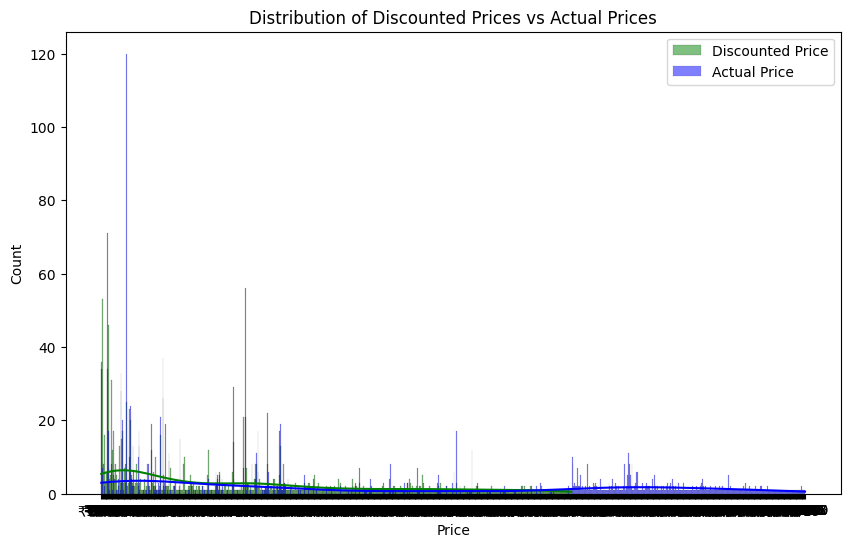

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['discounted_price'], bins=30, kde=True, color='green', label='Discounted Price')
sns.histplot(df2['actual_price'], bins=30, kde=True, color='blue', label='Actual Price')
plt.legend()
plt.title('Distribution of Discounted Prices vs Actual Prices')
plt.xlabel('Price')
plt.show()

In [14]:
#4. Average Discount Percentage Across Categories

Average Discount Percentage by Category:
category
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                                 90.0
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                          90.0
Electronics|Headphones,Earbuds&Accessories|Earpads                                                                  90.0
Electronics|Headphones,Earbuds&Accessories|Adapters                                                                 88.0
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers       87.5
                                                                                                                    ... 
OfficeProducts|OfficeElectronics|Calculators|Basic                                                                   0.0
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories|StandMixerAc

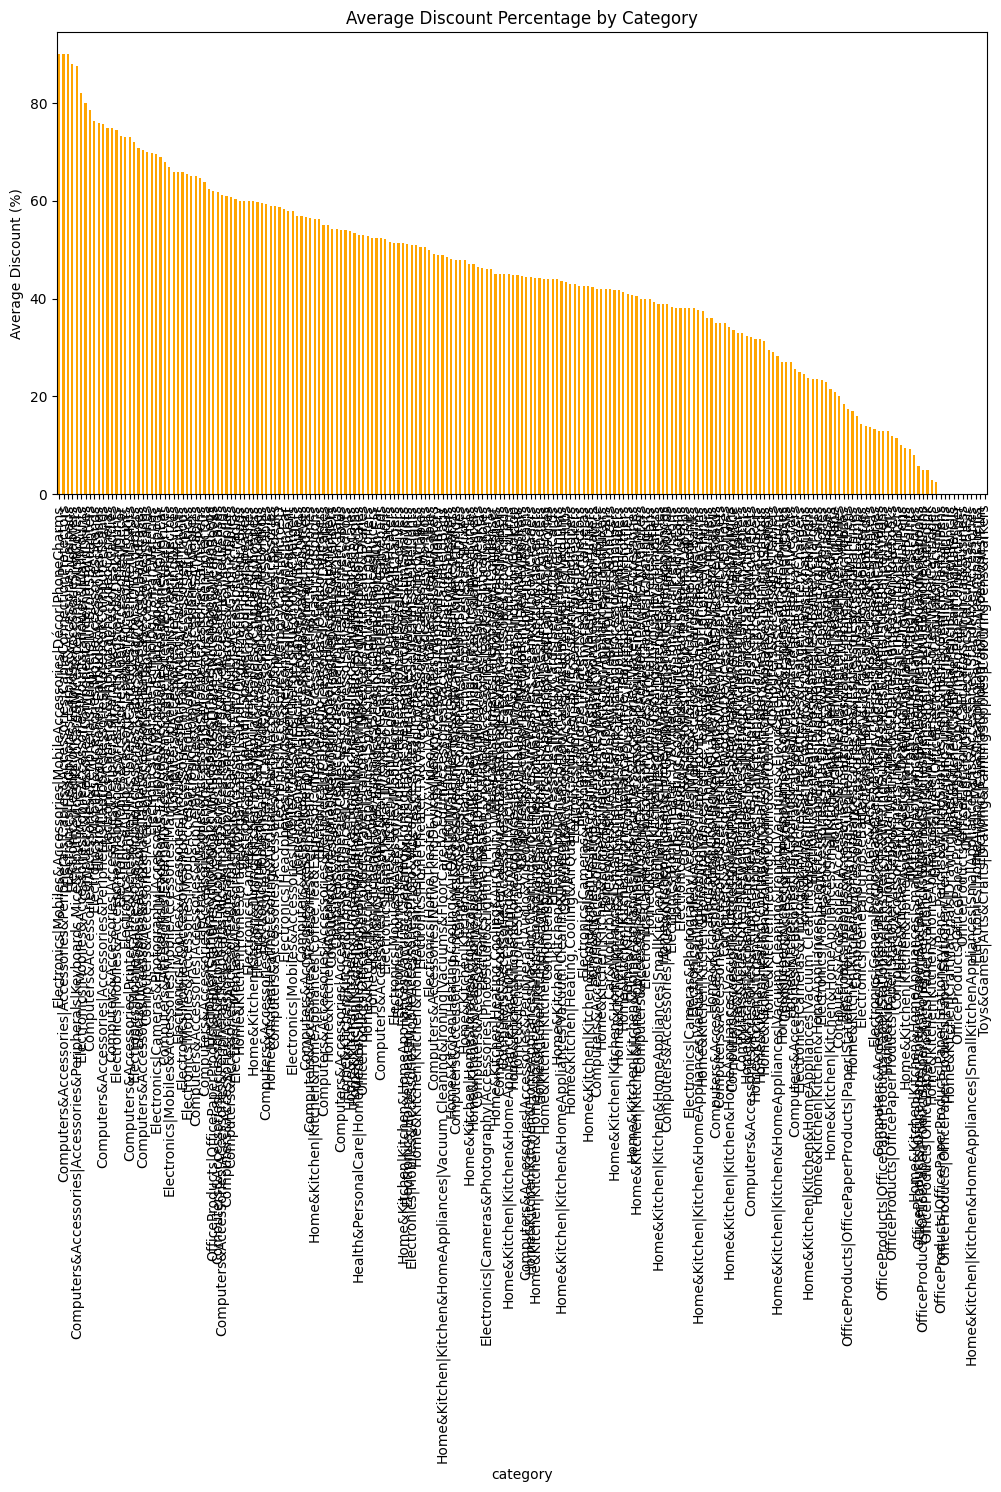

In [16]:
avg_discount_per_category = df2['discount_percentage'].str.rstrip('%').astype(float).groupby(df2['category']).mean().sort_values(ascending=False)
print("Average Discount Percentage by Category:")
print(avg_discount_per_category)

avg_discount_per_category.plot(kind='bar', figsize=(12, 6), title='Average Discount Percentage by Category', color='orange')
plt.ylabel('Average Discount (%)')
plt.show()

In [17]:
#5. Most Popular Product Names

Most Popular Product Names:
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution             5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                      4
Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)    3
MI Braided USB Type-C Cable for Charging Adapter (Red)                                                                                                                3
Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)                                       3
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                 

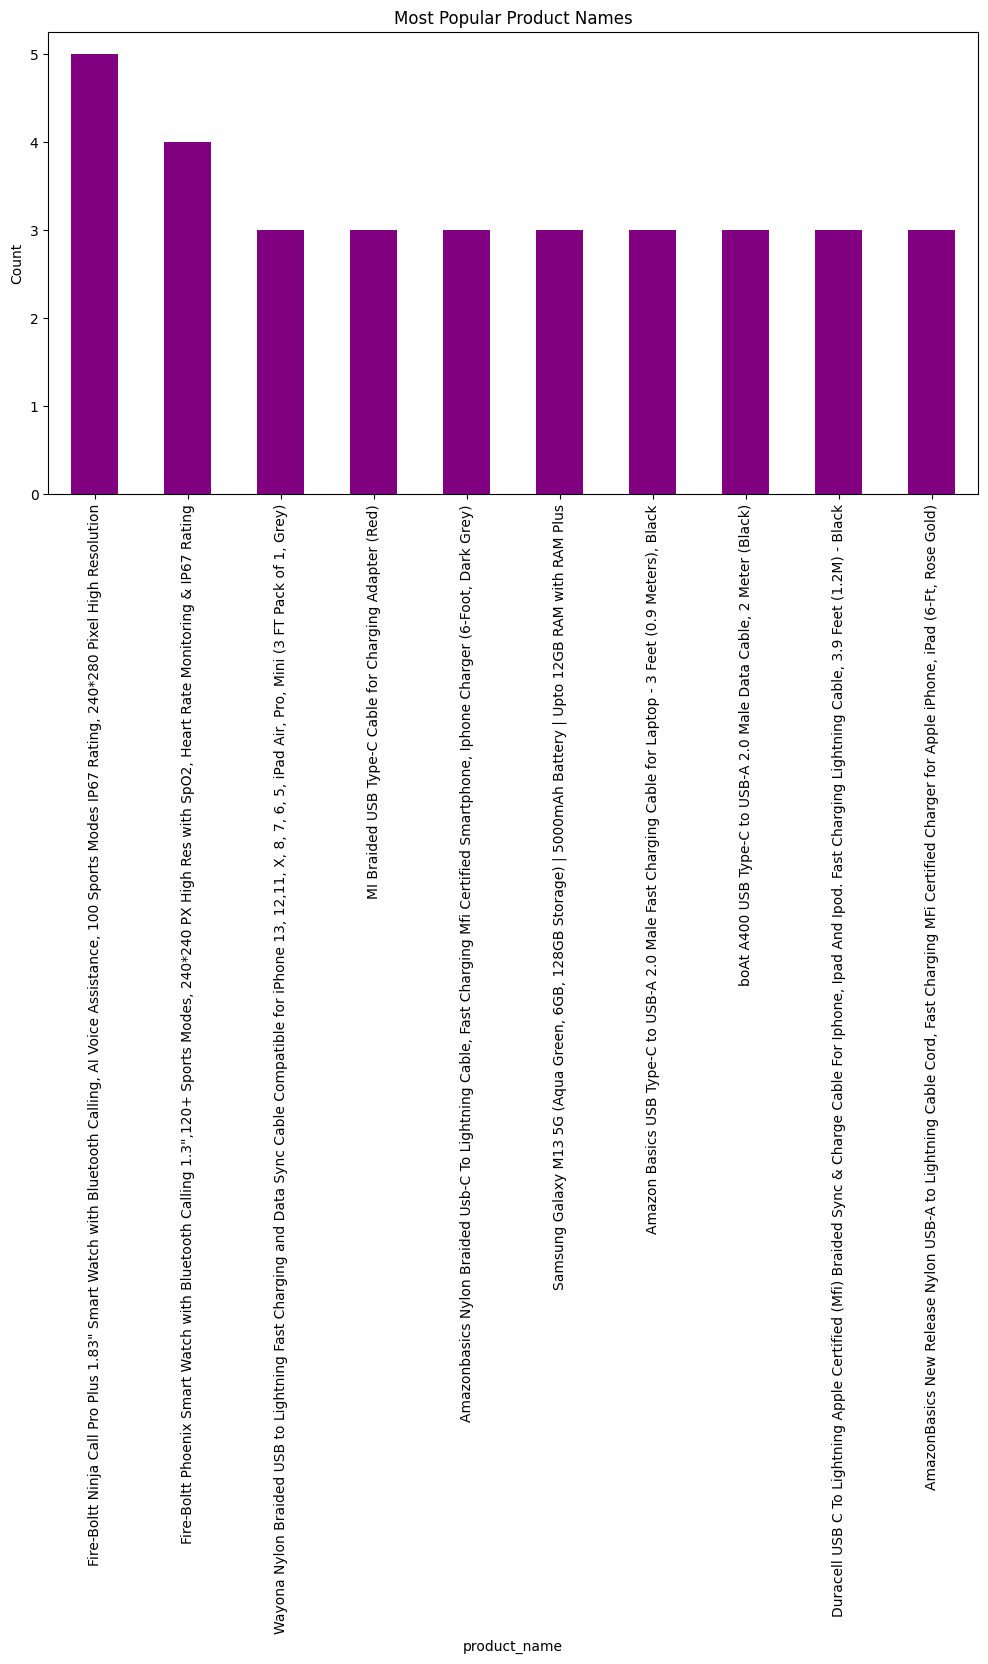

In [18]:
popular_products = df2['product_name'].value_counts().head(10)
print("Most Popular Product Names:")
print(popular_products)

# Visualization
popular_products.plot(kind='bar', figsize=(12, 6), title='Most Popular Product Names', color='purple')
plt.ylabel('Count')
plt.show()


In [19]:
#6. Most Popular Product Keywords

Most Popular Product Keywords:
[('with', 718), ('for', 614), ('|', 457), ('&', 432), ('USB', 342), ('and', 310), ('Cable', 306), ('-', 220), ('Charging', 212), ('Fast', 208)]


<ipython-input-20-a6290280b3dd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Keyword', data=keywords_df, palette='viridis')


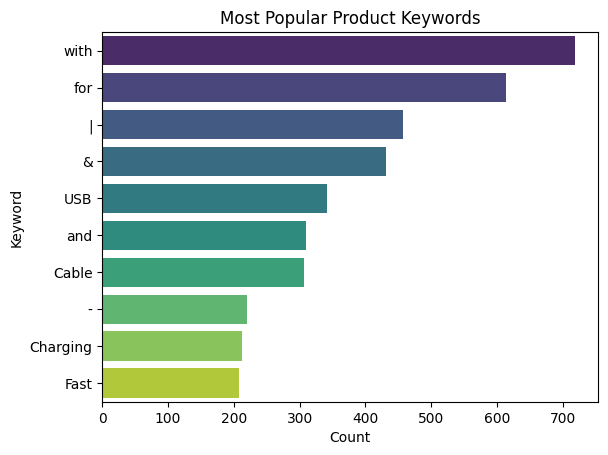

In [20]:
from collections import Counter
keywords = ' '.join(df2['product_name'].dropna()).split()
keyword_counts = Counter(keywords).most_common(10)
print("Most Popular Product Keywords:")
print(keyword_counts)

# Visualization
keywords_df = pd.DataFrame(keyword_counts, columns=['Keyword', 'Count'])
sns.barplot(x='Count', y='Keyword', data=keywords_df, palette='viridis')
plt.title('Most Popular Product Keywords')
plt.show()

In [21]:
#7. Find the most popular reviews based on review_count

In [22]:
popular_reviews = df2.sort_values('rating_count', ascending=False)[['product_name', 'review_title', 'review_content', 'rating_count']].head(10)
print("Most Popular Product Reviews:")
print(popular_reviews)

Most Popular Product Reviews:
                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
977   Sennheiser CX 80S in-Ear Wired Headphones with...   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
536   boAt Rockerz 400 Bluetooth On Ear Headphones W...   
918   boAt Rockerz 400 Bluetooth On Ear Headphones W...   
1165  Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...   

                                           review_title  \
1279  Decent product,doesn't pick up sand,Ok ok,Must...   
750   Nice .,very good batteries received,Longtevity...   
977   A Quality Sound-Signature but leaves craving f...   
1059  Kettle is good but bottle is not good quality,...   
151   Great Cable, Chargi

In [23]:
#8. Correlation Between Discounted_Price and Rating


In [26]:
df2['discounted_price'] = df2['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
correlation = df2['discounted_price'].corr(df2['rating'])
correlation

0.12033741712288548

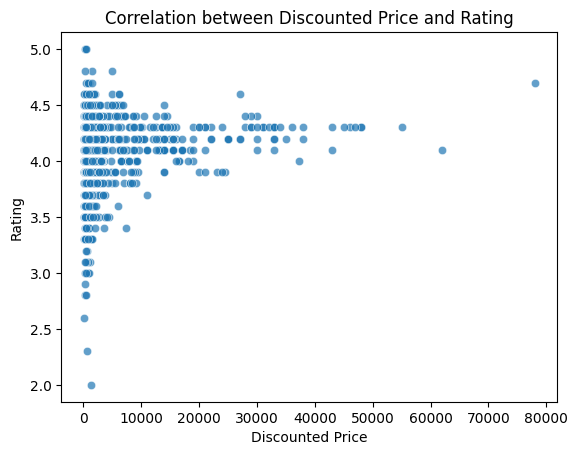

In [27]:
sns.scatterplot(x='discounted_price', y='rating', data=df2, alpha=0.7)
plt.title('Correlation between Discounted Price and Rating')
plt.xlabel('Discounted Price')
plt.ylabel('Rating')
plt.show()

In [28]:
#9. Top 5 Categories Based on Highest Ratings

In [30]:
top_categories_by_rating = avg_rating_per_category.head(5)
top_categories_by_rating

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64

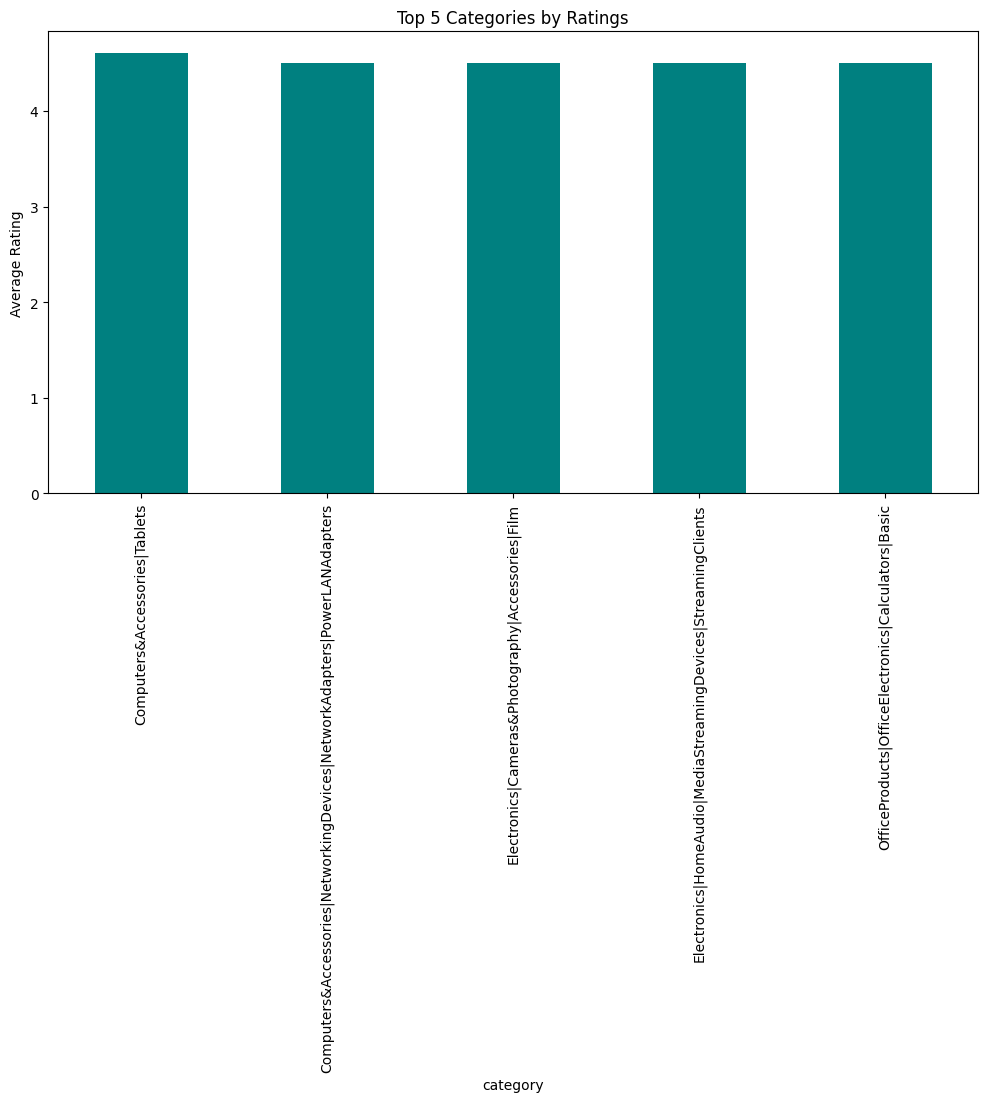

In [31]:
top_categories_by_rating.plot(kind='bar', figsize=(12, 6), title='Top 5 Categories by Ratings', color='teal')
plt.ylabel('Average Rating')
plt.show()

In [32]:
#10. Areas for Improvement or Optimization

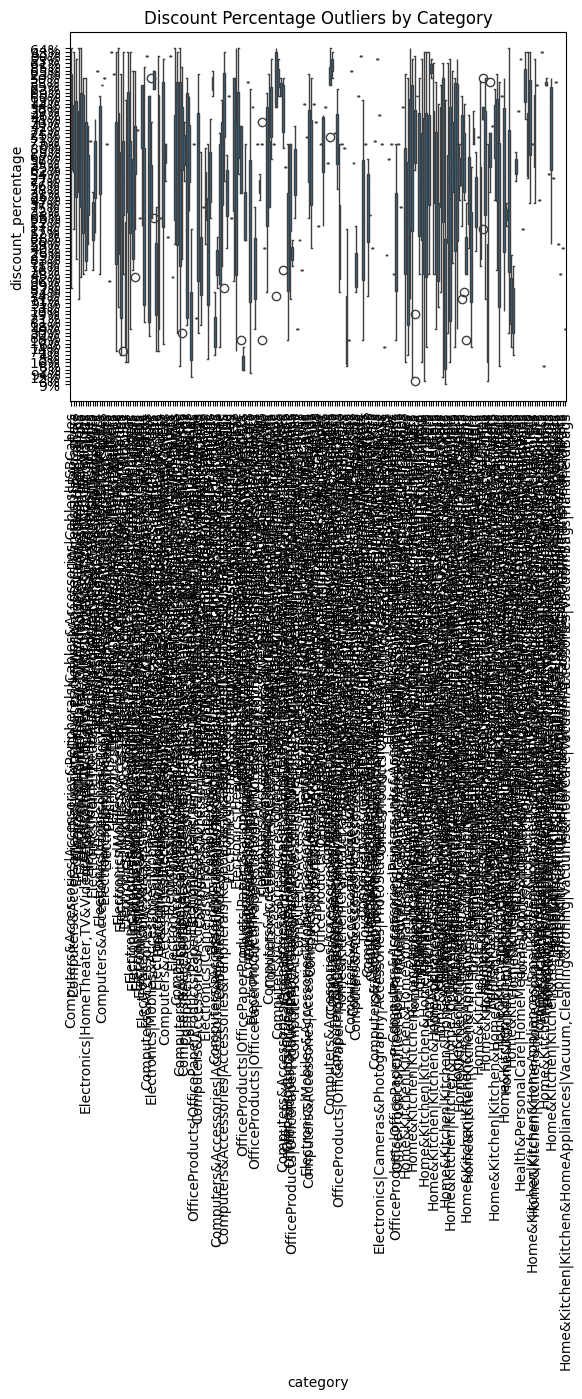

In [33]:
sns.boxplot(x='category', y='discount_percentage', data=df2)
plt.title('Discount Percentage Outliers by Category')
plt.xticks(rotation=90)
plt.show()

EDA 4 : Spotify

In [34]:
df3 = pd.read_csv("spotify.csv")
df3


Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e  

[440 rows x 5 columns]

In [35]:

# 1. Handle null values and duplicates

In [41]:
df3.isnull().sum()
df3.dropna(inplace=True)
df3.duplicated().sum()
df3.drop_duplicates(inplace=True)

In [42]:
# 2. Distribution of popularity

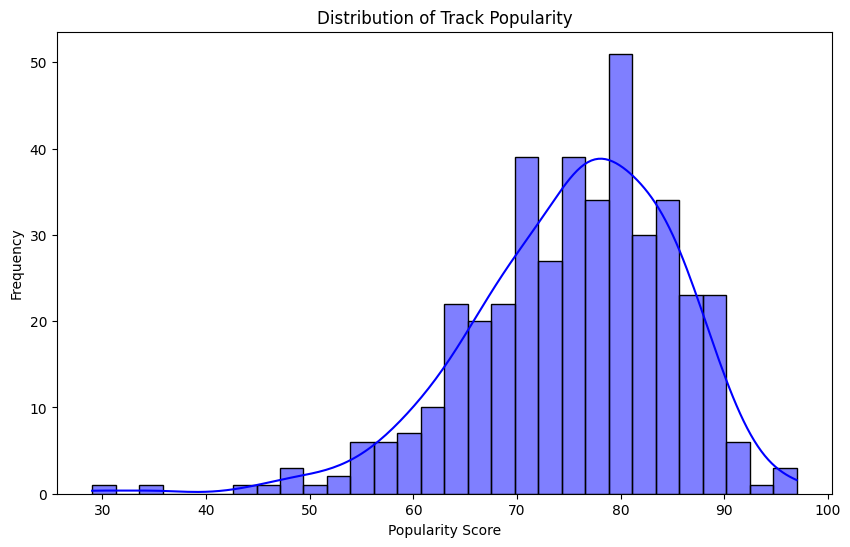

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df3['Popularity'], kde=True, bins=30, color='blue')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity Score")
plt.ylabel("Frequency")
plt.show()

In [44]:
# 3. Relationship between popularity and duration

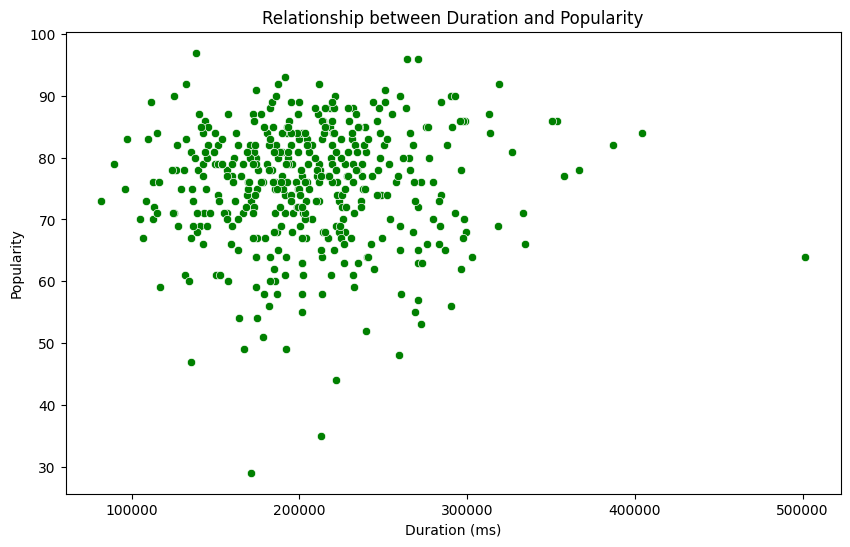

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration (ms)', y='Popularity', data=df3, color='green')
plt.title("Relationship between Duration and Popularity")
plt.xlabel("Duration (ms)")
plt.ylabel("Popularity")
plt.show()

In [46]:
# 4. Artist with the highest number of tracks

<ipython-input-48-42da15a94e4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Artist', order=artist_counts.index[:10], data=df3, palette='viridis')


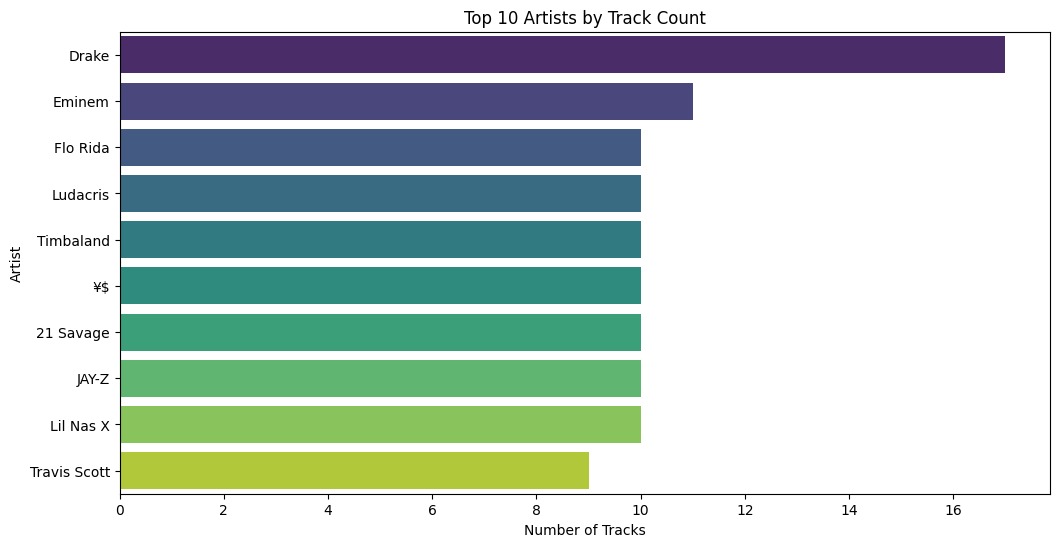

In [48]:
plt.figure(figsize=(12, 6))
artist_counts = df3['Artist'].value_counts()
sns.countplot(y='Artist', order=artist_counts.index[:10], data=df3, palette='viridis')
plt.title("Top 10 Artists by Track Count")
plt.xlabel("Number of Tracks")
plt.ylabel("Artist")
plt.show()

In [49]:
# 5. Top 5 least popular tracks
least_popular = df3.nsmallest(5, 'Popularity')[['Artist', 'Track Name', 'Popularity']]
print("Top 5 Least Popular Tracks:")
print(least_popular)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [50]:
# 6. Top 5 most popular artists' average popularity

In [51]:
top_artists = df3['Artist'].value_counts().head(5).index
avg_popularity = df3[df3['Artist'].isin(top_artists)].groupby('Artist')['Popularity'].mean().sort_values(ascending=False)
print("\nAverage Popularity of Top 5 Most Popular Artists:")
print(avg_popularity)



Average Popularity of Top 5 Most Popular Artists:
Artist
Eminem       83.636364
Drake        82.882353
Flo Rida     78.000000
Timbaland    69.000000
Ludacris     63.000000
Name: Popularity, dtype: float64


In [52]:
# 7. Most popular tracks of the top 5 artists
most_popular_tracks = df3[df3['Artist'].isin(top_artists)].sort_values(['Artist', 'Popularity'], ascending=[True, False])
most_popular_tracks = most_popular_tracks.groupby('Artist').first()[['Track Name', 'Popularity']]
print("\nMost Popular Tracks of Top 5 Artists:")
print(most_popular_tracks)


Most Popular Tracks of Top 5 Artists:
                                        Track Name  Popularity
Artist                                                        
Drake      Rich Baby Daddy (feat. Sexyy Red & SZA)          92
Eminem                                  Without Me          90
Flo Rida                        Low (feat. T-Pain)          84
Ludacris                              My Chick Bad          67
Timbaland                            The Way I Are          85


<Figure size 1000x1000 with 0 Axes>

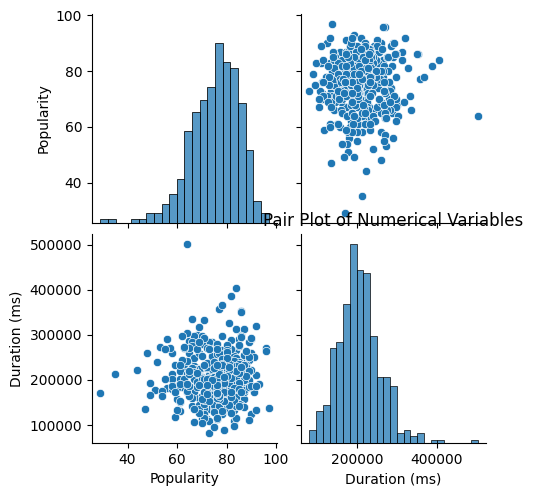

In [54]:
# 8. Pair plot for numerical variables
plt.figure(figsize=(10, 10))
sns.pairplot(df3[['Popularity', 'Duration (ms)']])
plt.title("Pair Plot of Numerical Variables")
plt.show()


<ipython-input-55-5af17305da43>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Artist', y='Duration (ms)', data=top_artists_duration, palette='Set3')


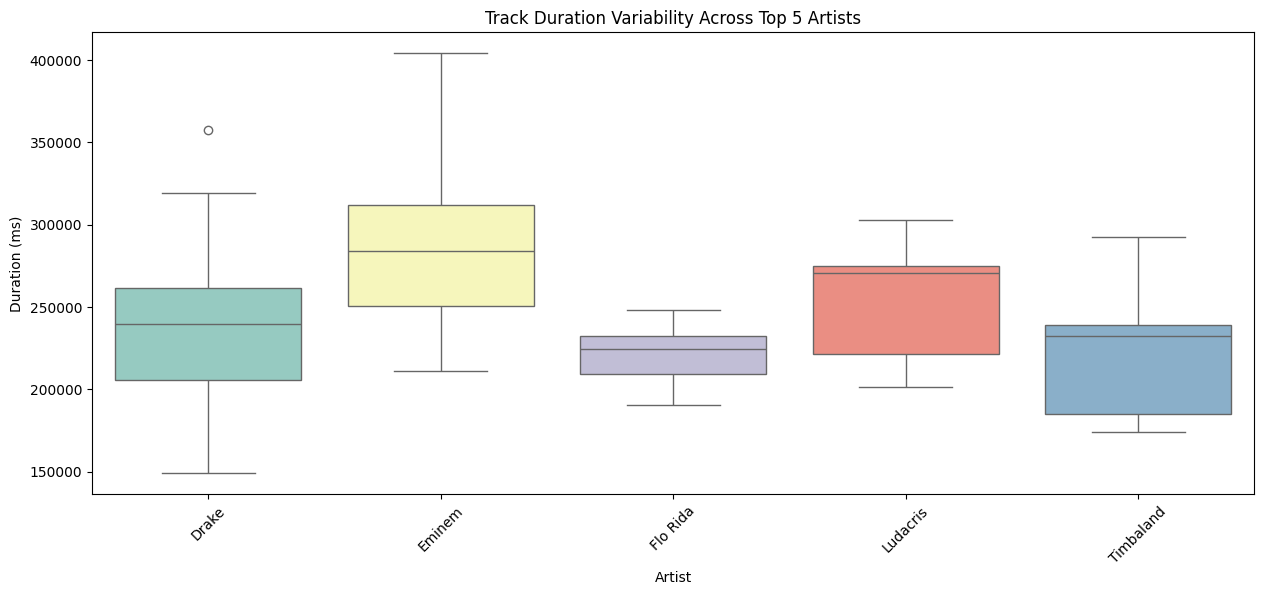

In [55]:
# 9. Duration variability across artists
plt.figure(figsize=(15, 6))
top_artists_duration = df3[df3['Artist'].isin(top_artists)]
sns.boxplot(x='Artist', y='Duration (ms)', data=top_artists_duration, palette='Set3')
plt.title("Track Duration Variability Across Top 5 Artists")
plt.xlabel("Artist")
plt.ylabel("Duration (ms)")
plt.xticks(rotation=45)
plt.show()

<ipython-input-56-c9da427dcaa3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Artist', y='Popularity', data=top_artists_duration, palette='muted')


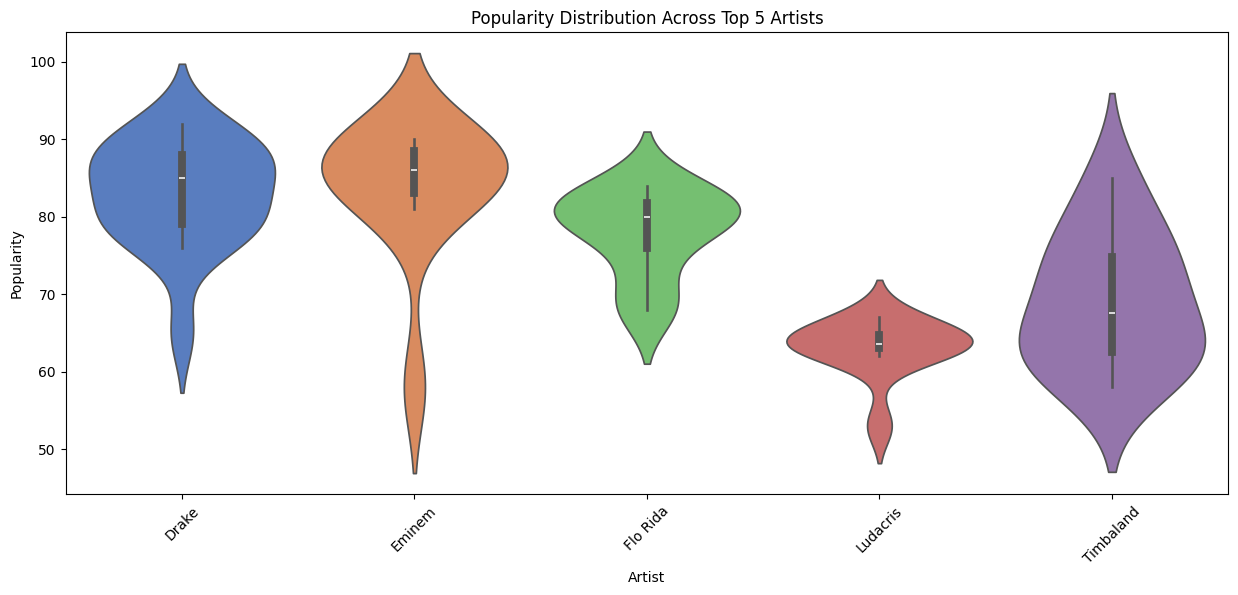

In [56]:
# 10. Popularity distribution for different artists
plt.figure(figsize=(15, 6))
sns.violinplot(x='Artist', y='Popularity', data=top_artists_duration, palette='muted')
plt.title("Popularity Distribution Across Top 5 Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.xticks(rotation=45)
plt.show()